# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [9]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 00000209_brain_t1.nii to 00000209_brain_t1 (1).nii


## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [8]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

NameError: name 'nib' is not defined

## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

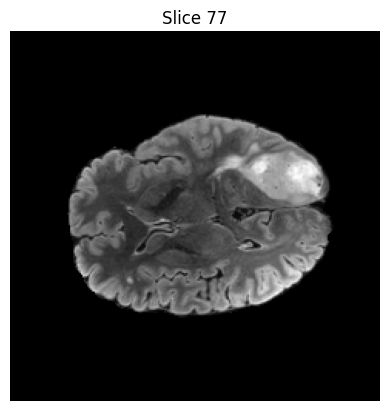

In [ ]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='grey')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [ ]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

155

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(239.5), np.float64(239.5), np.float64(-0.5))

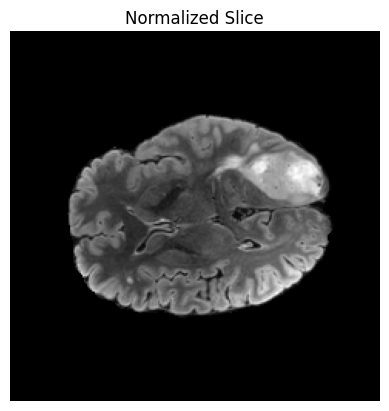

In [ ]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

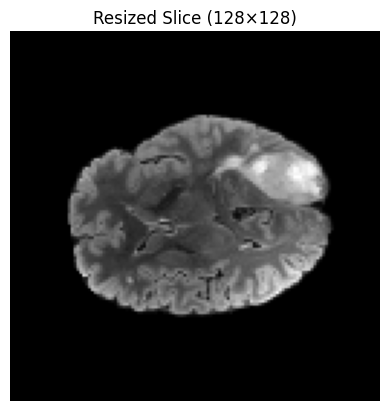

In [ ]:
import torch.nn.functional as F

# norm_slice: 2D numpy array (H, W)
x = torch.from_numpy(norm_slice).float()      # (H, W)
x = x.unsqueeze(0).unsqueeze(0)              # (1, 1, H, W)

resized = F.interpolate(x, size=(128, 128), mode='bilinear', align_corners=False)
resized = resized.squeeze().numpy()          # (128, 128)

plt.imshow(resized, cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving 00000209_brain_t1.nii to 00000209_brain_t1 (1).nii


In [10]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (240, 240, 155)


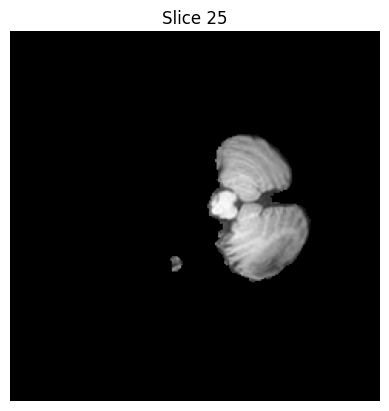

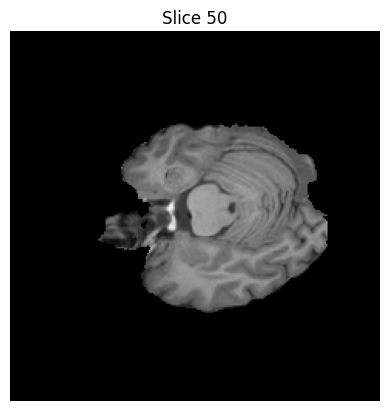

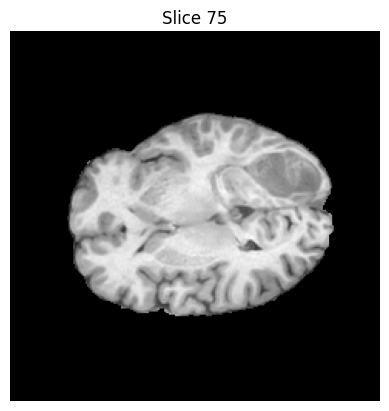

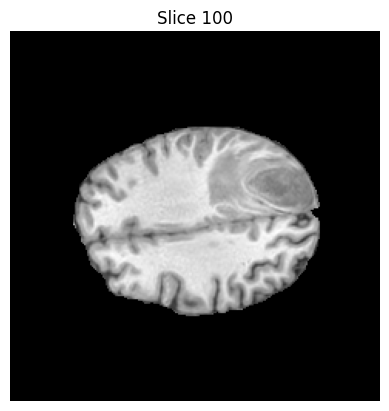

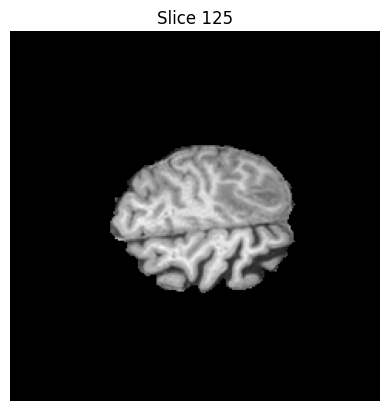

In [22]:
for i in range(1,6,1):
  slice_index = i * (mri.shape[2]//6)
  plt.imshow(mri[:, :, slice_index], cmap='grey')
  plt.title(f'Slice {slice_index}')
  plt.axis('off')
  plt.show()




24


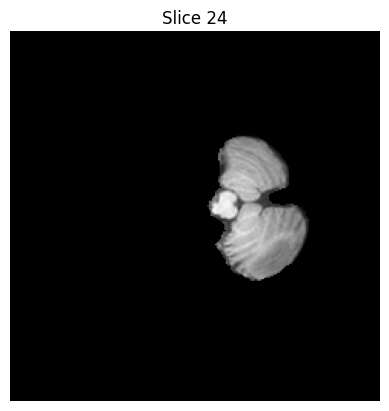

None


In [21]:
def plot_slices(volume,indices):
  plt.imshow(volume[:,:,indices],cmap="grey")
  plt.title(f'Slice {indices}')
  plt.axis("off")
  plt.show()
x = int(input())
print(plot_slices(mri,x))


In [17]:
def norm_mri():
  p1 = np.percentile(mri,1)
  p2 = np.percentile(mri,99)
  mri = (mri -p1)/p2-p1
  return mri
